# HSE 2022: Mathematical Methods for Data Analysis

## Seminar 12: A/B tests
**Authors**: Mikhail Hushchyn (sections 0-3), Filipp Ulyankin (sections 4-5)
<br></br>

<center> 
    <table>
        <tr>
            <th> Class Teachers </th>
            <th> Contact </th>
            <th> Group </th>
            <th> TA (contact) </th>
        </tr> 
        <tr><td> Andrey Egorov </td><td> tg: @andrei_egorov </td><td> БПИ201, БПИ202 </td><td> Andrei Dyadynov (tg: @mr_dyadyunov), Nikita Tatarinov (tg: @NickyOL) </td></tr>
        <tr><td> Kirill Bykov </td><td> tg: @darkydash </td><td> БПИ203, БПИ204 </td><td> Anastasia Egorova (tg: @wwhatisitt), Elizaveta Berdina (tg: @berdina_elis) </td></tr>
        <tr><td> Maria Tikhonova </td><td> tg: @mashkka_t </td><td> БПИ205 </td><td> Alexander Stepin (tg: @kevicia) </td></tr>
        <tr><td> Anastasia Voronkova </td><td> tg: @kotovasyka </td><td> БПИ206, БПИ207 </td><td> Anton Alekseev (tg: @flameglamebeatskilla), Emil Akopyan (tg: @archivarius) </td></tr>        
    </table>

</center>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import scipy

from scipy import stats
from tqdm import tqdm as tqdm_botebook

import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

# 0. Проверка гипотез (recap)

P-value
![title](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/P-value_in_statistical_significance_testing.svg/474px-P-value_in_statistical_significance_testing.svg.png)

### Критерии Стьюдента (T-тест)

Работает для тех значений, которые распределены нормально

Нужно проверить на нормальность:
- q-q plot
- Критерий Шапиро-Уилка: (гипотеза о нормальности распределения)

In [2]:
test_norm = np.random.normal(size=5000)
test_exp = np.random.exponential(size=5000)

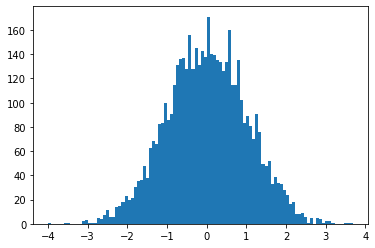

In [3]:
plt.hist(test_norm, bins=100)
plt.show()

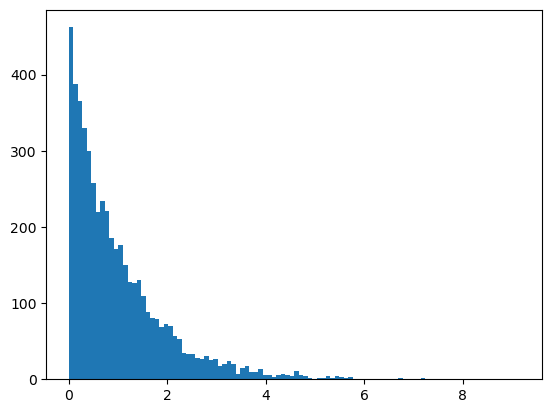

In [ ]:
plt.hist(test_exp, bins=100)
plt.show()

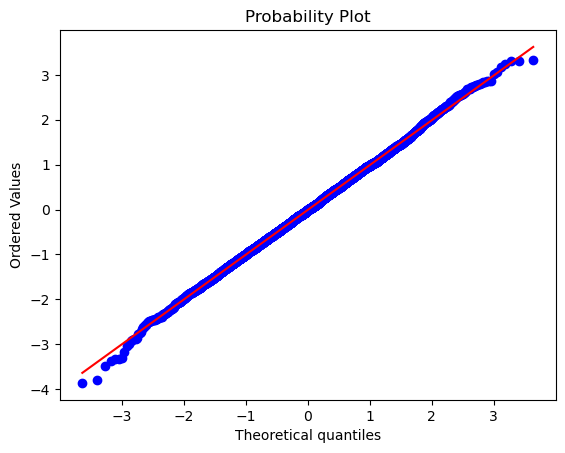

In [ ]:
stats.probplot(test_norm, dist="norm", plot=plt)
plt.show()

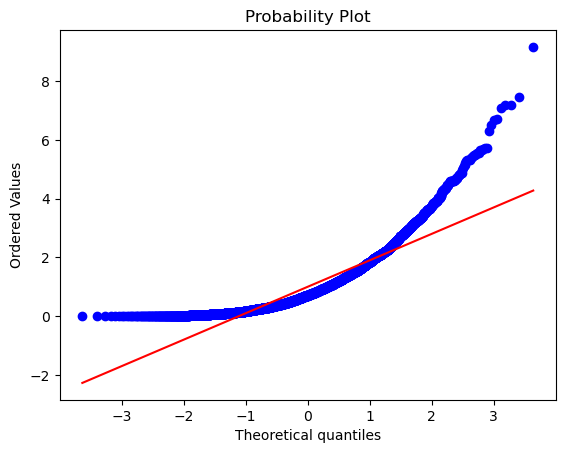

In [ ]:
stats.probplot(test_exp, dist="norm", plot=plt)
plt.show()

In [ ]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(test_norm))

Shapiro-Wilk normality test, W-statistic: 0.999523, p-value: 0.250390


In [ ]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(test_exp))

Shapiro-Wilk normality test, W-statistic: 0.823617, p-value: 0.000000


### а) Одновыборочный критерий Стьюдента

$H_0\colon$ среднее значение некоторой выборки равняется заданному числу $m$,

$H_1\colon$ не равно.

Критерий:

$$t = \frac{\bar{X} - m}{s/\sqrt{n}}$$ 

$$s^2 = \frac{1}{n-1}\sum_{i}^{n} (X_i - \bar{X})^2$$ 

где $\bar{X}$ - среднее значение случайной величины $X$; $s$ - несмещенная оценка дисперсии; $n$ - размер выборки. При нулевой гипотезе эта статистика имеет распределение Стьюдента с $(n-1)$ степенями свободы.

Для полученного значения критерия вычисляем p-value $p$. 
- Если $p < \alpha$, то гипотеза $H_0$ отвергается в пользу $H_1$.
- Если $p \ge \alpha$, то принимается гипотеза $H_0$.

Обычно пороговое значение $\alpha=0.05$.

In [4]:
from statsmodels.stats.weightstats import *

stats.ttest_1samp(test_norm, 0.02)

Ttest_1sampResult(statistic=-0.6404649571338382, pvalue=0.521899719414681)

In [5]:
print("95%% confidence interval: [%f, %f]" % zconfint(test_norm))

95% confidence interval: [-0.017117, 0.038834]


In [6]:
stats.ttest_1samp(test_norm, 0.05)

Ttest_1sampResult(statistic=-2.742264763734949, pvalue=0.006123438331253927)

### б) Двувыборочный критерий Стьюдента

$H_0\colon$ средние значения двух выборок одинаковы

$H_1\colon$ не одинаковы.

Рассмотрим разность средних значений двух выборок $\bar{X}_1$ и $\bar{X}_2$:

$$\Delta = \bar{X}_1 - \bar{X}_2$$

Дисперсия разности равна:

$$s^2_{\Delta} = \frac{s_1^{2}}{n_1} + \frac{s_2^{2}}{n_2}$$ 

где

$$s^2 = \frac{1}{n-1}\sum_{i}^{n} (X_i - \bar{X})^2$$ 


Двувыборочный критерий Стьюдента:

$$t = \frac{\Delta}{s_{\Delta}}$$ 


где $\bar{X}$ - среднее значение случайной величины $X$; $s$ - несмещенная оценка дисперсии; $n$ - размер выборки. При нулевой гипотезе  и $s_1 = s_2$ эта статистика имеет распределение Стьюдента с $(n_1 + n_2 - 2)$ степенями свободы.

Для полученного значения критерия вычисляем p-value $p$. 
- Если $p < \alpha$, то гипотеза $H_0$ отвергается в пользу $H_1$.
- Если $p \ge \alpha$, то принимается гипотеза $H_0$.

Обычно пороговое значение $\alpha=0.05$.

In [7]:
test_a = np.random.normal(loc=0.05, size=10000)
test_b = np.random.normal(loc=0.0, size=10000)

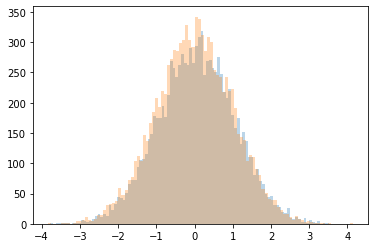

In [8]:
plt.hist(test_a, bins=100, alpha=0.3)
plt.hist(test_b, bins=100, alpha=0.3)
plt.show()

In [9]:
print("95%% confidence interval for a: [%f, %f]" % zconfint(test_a))
print("95%% confidence interval for b: [%f, %f]" % zconfint(test_b))

95% confidence interval for a: [0.034064, 0.073334]
95% confidence interval for b: [-0.021100, 0.018093]


In [10]:
scipy.stats.ttest_ind(test_a, test_b, equal_var=False)

Ttest_indResult(statistic=3.9001983773965003, pvalue=9.642806418503192e-05)

### d) Двувыборочный критерий Стьюдента для зависимых выборок
$H_0\colon$ средние значения двух выборок одинаковы

$H_1\colon$ не одинаковы.

Критерий:

$$t = \frac{M_d}{s_d/\sqrt{n}}$$ 

где $M_d$ - среднее значение случайной величины $d = X_1 - X_2$; $s_d$ - несмещенная оценка дисперсии это случайной величины; $n$ - размер выборки. При нулевой гипотезе эта статистика имеет распределение Стьюдента с $(n-1)$ степенями свободы.

Для полученного значения критерия вычисляем p-value $p$. 
- Если $p < \alpha$, то гипотеза $H_0$ отвергается в пользу $H_1$.
- Если $p \ge \alpha$, то принимается гипотеза $H_0$.

Обычно пороговое значение $\alpha=0.05$.

In [11]:
SIZE = 1000

In [12]:
test_ab = np.random.normal(size=SIZE)
test_a = test_ab + np.random.normal(loc=0.4, size=SIZE)
test_b = test_ab + np.random.normal(loc=0.5, size=SIZE)

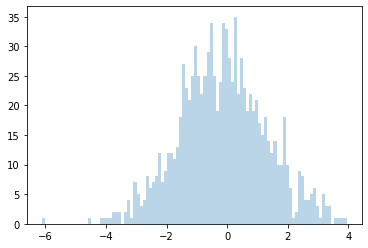

In [13]:
mean_list = test_a - test_b
plt.hist(mean_list, bins=100, alpha=0.3)
plt.show()

In [14]:
scipy.stats.ttest_ind(test_a, test_b, equal_var=False)

Ttest_indResult(statistic=-2.3839688716145626, pvalue=0.017219927525139)

In [15]:
stats.ttest_rel(test_a, test_b)

Ttest_relResult(statistic=-3.367585545259974, pvalue=0.0007872269361830485)

In [16]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(mean_list).tconfint_mean())

95% confidence interval: [-0.243307, -0.064148]


## Непараметрические критерии

Используются, если выборки распределены ненормально

### Двувыборочный непараметрический критерий для независимых выборок
$H_0\colon$ средние значения двух выборок одинаковы

$H_1\colon$  не одинаковы.

### Ранговый критерий Манна-Уитни

- Собираем наблюдения в одну выборку с $n = n_1 + n_2$ наблюдениями.
- Ранжируем наблюдения. Считаем сумму рангов отдельно для каждой группы: $R_x$ и $R_y$.
- Считаем статистики:

$$U_x = R_x - \frac{n_1(n_1+1)}{2}$$
$$U_y = R_y - \frac{n_2(n_2+1)}{2}$$
$$U = \min(U_x, U_y)$$

- Для полученного значения критерия вычисляем p-value $p$. 
    - Если $p < \alpha$, то гипотеза $H_0$ отвергается в пользу $H_1$.
    - Если $p \ge \alpha$, то принимается гипотеза $H_0$.

Обычно пороговое значение $\alpha=0.05$.

In [17]:
np.random.seed(42)
N = 10

test_a = np.random.beta(2., 2., size=N)
test_b = np.random.beta(2., 3., size=N)

In [18]:
test_a.mean(), test_b.mean()

(0.5472312733236799, 0.36687490750463303)

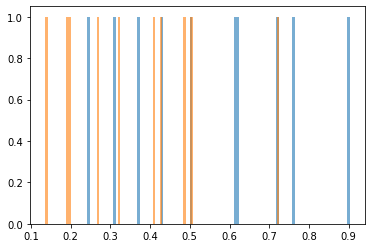

In [19]:
plt.hist(test_a, bins=100, alpha=0.6)
plt.hist(test_b, bins=100, alpha=0.6)
plt.show()

In [20]:
scipy.stats.ttest_ind(test_a, test_b, equal_var=False)

Ttest_indResult(statistic=2.0495584680258787, pvalue=0.05567583433587789)

In [21]:
stats.mannwhitneyu(test_a, test_b)

MannwhitneyuResult(statistic=74.0, pvalue=0.07566157214388704)

In [22]:
print('95%% confidence interval for the mean test_a: [%f, %f]' % zconfint(test_a))
print('95%% confidence interval for the mean test_b: [%f, %f]' % zconfint(test_b))

95% confidence interval for the mean test_a: [0.415666, 0.678797]
95% confidence interval for the mean test_b: [0.255353, 0.478397]


# 1.  A/B тест - первичный анализ

A/B-тестирование (англ. A/B testing, Split testing) — метод маркетингового исследования, суть которого заключается в том, что контрольная группа элементов сравнивается с набором тестовых групп, в которых один или несколько показателей были изменены, для того, чтобы выяснить, какие из изменений улучшают целевой показатель и улучшают ли.

Типичное применение в веб-дизайне — исследование влияния цветовой схемы, расположения и размера элементов интерфейса на конверсию сайта.

**Конверсия (Conversion Rate) в интернет-маркетинге** — это отношение числа посетителей сайта, выполнивших на нём какие-либо целевые действия (покупку, регистрацию, подписку, посещение определённой страницы сайта, переход по рекламной ссылке), к общему числу посетителей сайта, выраженное в процентах. 



В теории принципы A/B тестирования невероятно просты:

- Выдвигаем предположение о том, что какое-то изменение (например, персонализация главной страницы) увеличит конверсию интернет-магазина.

- Создаем альтернативную версию сайта «Б» — копию исходной версии «А» с изменениями, от которых мы ждем роста эффективности сайта.

- Всех посетителей сайта случайным образом делим на две равные группы: одной группе показываем исходный вариант (контрольная группа) , второй группе (тестовой) — альтернативный. Одновременно измеряем конверсию для обеих версий сайта.

- Определяем статистически достоверно победивший вариант.

Мы будем анализировать результаты A/B тестирования двух версий дизайна кнопки сайта интернет-магазина. 

Целевым действием считаем клик по этой кнопке. 

Первые три этапа А/В тестирования за нас провели, результаты предоставили в виде файла ab_dataset.csv. Нам осталось выполнить четвертый пункт.

Прочитаем данные из файла `ab_dataset.csv`. Сохраним их в датафрейм `df`. 

Прочитаем данные и посмотрим на первые 5 строк:

In [23]:
!wget https://raw.githubusercontent.com/hse-ds/iad-applied-ds/master/2021/seminars/sem10_stat/ab_data.csv --quiet

In [24]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Посмотрим, сколько посетителей заходио на сайт (количество строк в нашем датафрейме)

In [25]:
#количество посетителей всего
n_rows = df.shape[0]
print("Число строк: {}".format(n_rows))

Число строк: 294478


Сколько уникальных пользователей (уникальных `user_id`) в датасете?

In [26]:
user_total = df.nunique()['user_id']
print("Число уникальных пользователей : {}".format(user_total))

Число уникальных пользователей : 290584


Посетителей из контрольной `control` группы должны были направлять на страницу в старом дизайне  `old_page` , пользователей из тестовой группы `treatment` - на страницу в новом дизайне `new_page`. Проверим, были ли ошибки при направлении.

In [27]:
mismatch_1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Из тестовой группы неверно направлены {}".format(len(mismatch_1)) + " пользователей")

mismatch_2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Из контрольной группы неверно направлены  {}".format(len(mismatch_2)) + " пользователей")

Из тестовой группы неверно направлены 1965 пользователей
Из контрольной группы неверно направлены  1928 пользователей


Выясним, есть ли в данных пропуски.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Из сообщений следует, что пропущенных значений нет.

Конверсия по всем посетителям

In [29]:
p_all=df['converted'].mean()
print("Конверсия по всем посетителям: {} %".format(p_all*100))

Конверсия по всем посетителям: 11.96591935560551 %


In [30]:
# можно и так:
sum(df['converted'].values)/n_rows

0.11965919355605512

Давайте посмотрим на описательную статистику нашего датасета (воспользуемся функцией  `describe`) и постараемся получить ответы на следующие вопросы:

- Какова вероятность клика для посетителей из контрольной группы (старый дизайн)?

- Какова вероятность клика для посетителей из тестовой группы (новый дизайн кнопки)?

- Каково соотношение размеров тестовой и контрольный групп? Какова вероятность, что очередной посетитель будет направлен на версию со старым дизайном? С новым дизайном?

In [31]:
df_grp = df.groupby('group')
df_grp.describe()

user_id                                                   \
              count           mean           std       min       25%   
group                                                                  
control    147202.0  788123.098035  91278.896888  630002.0  709287.0   
treatment  147276.0  787825.226283  91142.800641  630000.0  708729.5   

                                         converted                           \
                50%        75%       max     count      mean       std  min   
group                                                                         
control    788053.5  867155.50  945998.0  147202.0  0.120399  0.325429  0.0   
treatment  787837.5  866693.75  945999.0  147276.0  0.118920  0.323695  0.0   

                               
           25%  50%  75%  max  
group                          
control    0.0  0.0  0.0  1.0  
treatment  0.0  0.0  0.0  1.0

Ответы на остальные вопросы можно найти, например, так:

In [32]:
#объем тестовой группы
n_rows_treat = len(df[df['group'] == 'treatment'])

#объем контрольной группы
n_rows_contr = n_rows-n_rows_treat

print("Соотношение размеров тестовой и контрольной групп: {}".format(n_rows_treat/n_rows_contr))

print("Вероятность, что новый пользователь будет направлен на версию со старым дизайном: {}".format(n_rows_treat/n_rows))
print("Вероятность, что новый пользователь будет направлен на версию с новым дизайном: {}".format(n_rows_contr/n_rows))

Соотношение размеров тестовой и контрольной групп: 1.0005027105609978
Вероятность, что новый пользователь будет направлен на версию со старым дизайном: 0.5001256460584492
Вероятность, что новый пользователь будет направлен на версию с новым дизайном: 0.49987435394155083


**Задание **

А теперь ответьте на главный вопрос данного этапа:  выявил ли предварительный анализ, что дизайн кнопки влияет на конверсию и если да, то как именно?

# 2. A/B тест: статистический вывод

По нашим данным очевидно, что кликабельность старой версии выше, чем новой, и напрашивается решение оставить всё как есть.  Однако бизнес потребует обоснований для такого глобального решения, бОльших, чем "очевидно по результатам одного эксперимента". И такие обоснования предоставляет специально разработанная методология - статистический вывод. 

Статистический вывод - это переход от данных о статистической выборке (нашего датасета) к обобщениям в виде параметров генеральной совокупности с вычислением степени уверенности в справедливости этих обобщений.

Будем считать, что клик — это некоторая случайная переменная , принимающая значения 1  или 0 с вероятностями $\theta$ и $1-\theta$ соответственно. Применительно к нашей задаче посетитель может кликнуть на кнопку (с вероятностью $\theta$) или не кликнуть на нее (с вероятностью, соответственно,  $1-\theta$)

На практике статистические заключения опираются на допущения о том, как распределены рассматриваемые случайные переменные (данные). (Даже принято преобразовывать данные с тем, чтобы они соответствовали одному из известных распределений). Распределение вероятностей — это выражение, которое определяет, какие значения будет принимать данная переменная или параметр,  и как часто будет встречаться каждое из этих значений.

Наша случайная переменная — клик — имеет распределение, которое называется распределением Бернулли с параметром $\theta$:
$$ p(k) = \theta^k (1 - \theta)^{1 - k}, $$

где $p(k)$ —  вероятность случайной переменной  принять значение $k$, $k \in \{ 0;1\}$.

Из теории известно, что среднее значение распределения Бернулли равно $\mu = \theta$, а дисперсия равна $\sigma^2 = \theta(1 - \theta)$. Нас интересует конверсия сайта, в рассматриваемой постановке она равна $\theta$.

#### Формулировка рабочей гипотезы:

Рабочая гипотеза в нашем случае может быть сформулирована, например, так: "Конверсия сайта со старым дизайном не меньше, чем с новым"

#### Формальное описание нулевой и альтернативной гипотез:

$H_{0}$ : $\theta_{new}$ <= $\theta_{old}$ 

$H_{1}$ : $\theta_{new}$ > $\theta_{old}$ 

<a id='si1'></a>
#### Выбор подходящего статистического теста (статистического критерия)

Истинные значения $\theta_{new}$ и $\theta_{old}$ мы найти не можем, но мы можем их сравнить. В этом помогут те самые две теоремы.

На основании Закона больших чисел мы можем оценить средние значения случайных величин $\theta_{new}$ и $\theta_{old}$ на  генеральных совокупностях по их средним значениям на наших больших выборках.

На основании Центральной предельной теоремы средние значения распределены нормально при больших объемах выборок.

Чтобы выбрать для проверки наших гипотез подходящий статистический критерий, уясним задачу. Нам нужно выяснить, случайно или значимо отличаются средние значения, т.е. доли, кликнувших посетителей в контрольной и тестовой выборках.

<a id='si4'></a>
#### Проведение вычислений. $Z$-критерий.

$$Z = \frac{p_1 - p_2}{\sqrt{p(1-p) (\frac{1}{n_1} + \frac{1}{n_2})}}$$

где $p_1$ - конверсия в первой группе; $p_2$ - конверсия во второй группе; $p$ - конверсия во всех наблюдениях; $n_1$, $n_2$ - количество наблюдений в группах.

Для полученного значения критерия вычисляем p-value $p$. 
- Если $p < \alpha$, то гипотеза $H_0$ отвергается в пользу $H_1$.
- Если $p \ge \alpha$, то принимается гипотеза $H_0$.

Обычно пороговое значение $\alpha=0.05$.

In [ ]:
#Z-статистика
import statsmodels.api as sm
import statsmodels

convert_contr = sum(df.query("group == 'control'")['converted'])
convert_treat = sum(df.query("group == 'treatment'")['converted'])

z_score, p_value = sm.stats.proportions_ztest([convert_treat, convert_contr], [n_rows_treat, n_rows_contr], 
                                              alternative='larger')

print("Z-статистика={},  p_value={}".format(z_score, p_value))

Z-статистика=-1.2369217547321678,  p_value=0.8919419336512124


#### Проведение вычислений. $T$-test.

In [ ]:
t_score, p_value, _ = statsmodels.stats.weightstats.ttest_ind(df.query("group == 'treatment'")['converted'],
                                                              df.query("group == 'control'")['converted'],
                                                              alternative="larger",
                                                              usevar='unequal')

In [ ]:
print("T-статистика={},  p_value={}".format(t_score, p_value))

T-статистика=-1.2369191070650851,  p_value=0.8919409489056556


#### Проведение вычислений. $Mann–Whitney$-test.

In [ ]:
w_score, p_value = scipy.stats.mannwhitneyu(df.query("group == 'treatment'")['converted'], 
                         df.query("group == 'control'")['converted'],
                         alternative="greater")

In [ ]:
print("W-статистика={},  p_value={}".format(w_score, p_value))

W-статистика=10823622516.0,  p_value=0.8919415509213815


<a id='m12'></a>
### Ошибки первого и второго рода

|  | | | |
|----------|:---------|:--------|:---------|
|  | | 	Верная гипотеза: | |
|  |     | $H_0$   | $H_1$    |
| Результат применения критерия: | $H_0$   |$H_0$ верно принята  |$H_0$ неверно принята (ошибка II рода)  |  
|  |$H_1$   |$H_0$ неверно отвергнута(ошибка I рода)  | $H_0$ верно отвергнута   |



Уровень значимости (статистическая значимость, statistical significance) $\alpha$ - это и есть вероятность ошибки первого рода, т. е. вероятность принятия альтернативной гипотезы при условии, что на самом деле верна нулевая гипотеза. 

Обозначим  $\beta$  вероятность ошибки второго рода. 

Величина  $1-\beta$ называется *статистической мощностью* (statistical power) критерия. По сути мощность показывает, сколько значений, соответствующих альтернативной гипотезе, мы действительно отнесем к альтернативной гипотезе

![asd](https://habrastorage.org/files/475/9e5/ebc/4759e5ebcfc54b11a852704017d2d8ac.png)

# 4. A/B тест: пример на основе игры

По набору данных из курса: https://learn.datacamp.com/projects/184

In [ ]:
plt.style.use('ggplot')
%matplotlib inline

## О котах и печеньках

В этом разделе мы посмотрим на данные одной мобильной игры под названием "Cookie Cats", разработанной компанией <a href="http://tactile.dk">Tactile Entertainment</a>. Это стандартный match-three пазл, где игрокам нужно соединять элементы одинаковых цветов, чтобы очистить поле и выиграть на уровне. И еще там есть поющие коты. Это важно. 

<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>

По мере того, как игроки проходят уровни, они встречают ворота-блокеры, которые вынуждают их либо ждать длительное время, либо совершить внутриигровую покупку, чтобы продолжить играть. Помимо того, что эти ворота приносят разработчикам деньги от покупок, они еще и вынуждают игроков делать перерыв, в надежде на то, что те вернутся с новыми силами и снова начнут получать удовольствие от котиков. 

<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png" alt=""></p>

Но возникает вопрос - когда и где ставить эти ворота? Изначально первые ворота стояли на 30-м уровне игры, однако в этом ноутбуке мы будем анализировать АБ-тест, в котором разработчики передвинули ворота на 40-й уровень. В частности мы будем смотреть влияние этого изменения на такой важный показатель как "retention" или удержание игроков, который расчитывается как отношение уникальных игроков, зашедших в игру на 1-й, 2-й, ... N-й день после установки ко всем игрокам, установившим приложение в этот день. 

In [34]:
df = pd.read_csv('cookie_cats.csv')
print(df.shape)
df.head()

(90189, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


__Описание колонок:__

- `userid` - уникальный номер, идентифицирующий каждого игрока.
- `version` - был ли пользователь отнесен к контрольной группе (`gate_30` - ворота на 30-м уровне) или к тестовой (`gate_40` - ворота на 40-м уровне).
- `sum_gamerounds` - число сессий, сыгранных игроком в течение первых 14 дней после установки игры.
- `retention_1` - вернулся ли игрок после __первого__ дня с момента установки?
- `retention_7` - вернулся ли игрок после __седьмого__ дня с момента установки?

Когда игрок устанавливает игру, он/она случайным образом относятся либо к группе `gate_30`, либо `gate_40`. На всякий случай, давайте проверим, действительно ли их примерно поровну в каждой из группу.

In [35]:
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

## Распределение числа игровых сессий

<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/mr_waffles_smiling.png" style="width:200px; float:left"> </p>
<p>Похоже, что игроков действительно примерно поровну в каждой из групп, отлично!</p>
<p>Фокус нашего анализа будет сосредоточен на удержании игроков (retention), но ради интереса давайте построим распределение числа игровых сессий, сыгранных игроками в течение их первой недели жизни в игре.</p>

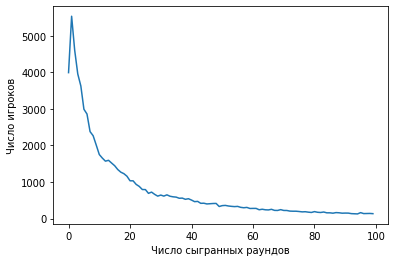

In [36]:
# Считаем число игроков, оставшееся в игре для каждого раунда
plot_df = df.groupby('sum_gamerounds')['userid'].count()

ax = plot_df.head(100).plot()
ax.set_xlabel("Число сыгранных раундов")
ax.set_ylabel("Число игроков");

<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/belle_cookie.png" style="width:200px; float:right"> </p>

На графике вверху мы видим, что некоторые игроки установили игру, но даже ни разу не поиграли (0 сессий), многие игроки закончили лишь пару сессий за первую неделю, а некоторые действительно подсели и сыграли более 80 раз!

Конечно, мы хотим, чтобы игроки были заинтересованы в игре и возвращались в неё снова и снова. Обычная метрика, использующаяся в игровой индустрии, чтобы измерить, насколько игра веселая и захватывающая, - это __удержание первого дня (1-day retention):__ Процент игроков, которые вренулись и снова стали играть спустя 1 день после установки. Чем выше удержание первого дня, тем проще и дальше удерживать пользователей и строить себе большую базу фанатов.

## Удержание первого дня (1-day retention) 

Посмотрим как выглядит удержание 1 дня.

In [37]:
df.retention_1.mean()

0.4452095044850259

А теперь по группам.

In [38]:
df.groupby('version').retention_1.mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Похоже, что у нас есть небольшое ухудшение в удержании первого дня, если мы двигаем ворота к сороковому уровню (44.2%) в сравнеии с контрольной группой, где ворота остались на 30-м уровне (44.8%). Разница, конечно, невелика, но даже маленькие изменения в удержании могут иметь значительные последствия. Давайте проверим значимость этого эффекта. Будем использовать тест о равенстве долей. 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_{40} = p_{30} \\
&H_1: \hspace{2mm} p_{40} < p_{30} 
\end{aligned}
$$

> **Предпосылки:** нет выбросов, много наблюдений. Наблюдения независимы. Тогда сможем использовать ЦПТ.

In [39]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05                    # уровень значимости = 5%

df_agg = df.groupby('version').retention_1.agg(['sum', 'count', 'mean'])
df_agg

,sum,count,mean
version,,,
gate_30,20034,44700,0.448188
gate_40,20119,45489,0.442283


In [40]:
n_obs = df_agg['count'].values  # размеры выборок
n_obs

array([44700, 45489])

In [41]:
m_obs = df_agg['sum'].values    # число успехов
p_obs = df_agg['mean'].values   # доли

z_obs, p_val =  proportions_ztest(m_obs, 
                                  n_obs, 
                                  value=0, 
                                  alternative='larger')

print(f"Наблюдаемое значение статистики: {z_obs:.3}") 
print(f"P-значение: {p_val:.3}") 

Наблюдаемое значение статистики: 1.78
P-значение: 0.0372


Гипотеза о равенстве долей отвергается на $5\%$ уровне значимости. Посмотрим на оценку мощности этого эксперимента. 

In [42]:
n_30, n_40 = n_obs  # размеры выборок
p_30, p_40 = p_obs  # доли 

# дисперсии
var_40, var_30 = p_40 * (1 - p_40), p_30 * (1 - p_30)

# стандартизированный размер эффекта
effect = (p_30 - p_40) / ((n_40* np.sqrt(var_40) + n_30 * np.sqrt(var_30)) / (n_40 + n_30))
effect

0.01188210610259806

In [43]:
n_obs[1]/n_obs[0]

1.0176510067114093

In [44]:
from statsmodels.stats.power import zt_ind_solve_power

zt_ind_solve_power(effect_size=effect, 
                   nobs1=sum(n_obs), 
                   alpha=0.05, 
                   power=None, 
                   ratio=n_obs[1]/n_obs[0],
                   alternative='larger')

0.8131005106557109

## Удержание седьмого дня (1-day retention) 

Cпустя неделю после установки, уже больше игроков пройдут 40 уровней, поэтому имеет смысл посмотреть на удержание седьмого дня. Т.е., какой процент людей, установивших игру, снова показался в игре через 7 дней.

In [45]:
df.groupby('version').retention_7.mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Как и с 1-day retention, мы видим, что 7-day retention немного ниже (18.2%), когда ворота находятся на 40-м уровне, чем на 30-м (19.0%). Эта разница также выше, чем для удержания первого дня, скорее всего из-за того, что игроки имели больше времени на то, чтобы столкнуться с первыми воротами. Мы также видим, что удержание 7-го дня в целом ниже, чем удержание 1-го - спустя неделю намного меньше людей всё ещё заходит в игру. По-прежнему возикает вопрос: а значима ли эта разница. 

In [46]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05                    # уровень значимости = 5%

df_agg = df.groupby('version').retention_7.agg(['sum', 'count', 'mean'])

n_obs = df_agg['count'].values  # размеры выборок
m_obs = df_agg['sum'].values    # число успехов
p_obs = df_agg['mean'].values   # доли

z_obs, p_val =  proportions_ztest(m_obs, n_obs, value=0, alternative='larger')

print(f"Наблюдаемое значение статистики: {z_obs:.3}") 
print(f"P-значение: {p_val:.3}") 

Наблюдаемое значение статистики: 3.16
P-значение: 0.000777


Видим, что разница сильно значима. Для 7-дневного удержания произойдёт довольно мощный обвал. 

## Выводы

<p>Итак, результаты АБ-теста говорят нам о том, что есть значительное доказательство превышения 7-day retention в группе с воротами на 30-м уровне над группой с воротами на 40-м. Значит, если мы хотим поддерживать удержание клиентов на высоком уровне и иметь большее число игроков, нам <strong>не нужно</strong> сдвигать ворота с 30-го на 40-й уровень.


<p>Так почему же удержание выше, когда ворота расположены раньше? Логично было бы ожидать обратной ситуации - чем позже ставится препятствие, тем дольше игроки будут взаимодействовать с игрой. Однако это не то, что мы видим в данных. Теория гедонистической адаптации может помочь с объяснением. Если вкратце, гедонистическая адаптация - это тенденция получать всё меньше и меньше удовольствия от деятельности, если она продолжается длительное время. Заставляя игроков сделать паузу, когда они достигают 30-го уровня, мы продлеваем им удовольствие от игры, в результате чего они хотят в неё возвращаться. И напротив, сдвигая ворота к 40-му уровню мы даем игрокам возможность наиграться и просто заскучать.</p>

> __Вопрос:__ что мы сделали неправильно? 

> __Ответ:__ при проведении эксперимента и проверке гипотезы мы никак не учитываем, что часть игроков вообще могла не дойти до ворот. Такие люди не остались в игре по каким-то иным причинам, не связанным с воротами. Если бы у нас были данные, связанные с этим, нам нужно было бы отфильтровать пользователей, которые не дошли в первый день до 30-го уровня. 


<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cookie_yellow.png" style="width:100px; float:center"> </p>

# 5.  Расчет необходимого количества наблюдений

## Гипотеза о кнопке

Посмотрим на пример с долями. У нас есть две кнопки: старая и новая. Мы хотим проверить гипотезу о том, что доля нажатий по обеим кнопкам совпадает. В качестве альтернативы рассматриваем вариант, что новый дизайн кнопки оказался лучше и нажать на неё хочется больше.

$$
\begin{aligned}
&H_0: \hspace{2mm} p_0 = p_a \\
&H_1: \hspace{2mm} p_0 < p_a  
\end{aligned}
$$

Величины $p_0$ и $p_a$ мы оцениваем, как отношение кликов на кнопку к показам в контрольной группе и в тестовой группе. Число наблюдений, которое нам необходимо, в таком случае, можно найти по формуле: 

$$
n = \left( \frac{\sqrt{p_0 \cdot (1 - p_0) } \cdot z_{1 - \alpha} + \sqrt{p_a \cdot (1 - p_a) } \cdot z_{1 - \beta} }{p_a - p_0}  \right)^2,
$$

где $n$- число наблюдений, $\alpha$ - ошибка первого рода, $\beta$ - ошибка второго рода, $z_{1 - \alpha}, z_{1 - \beta}$ - квантили нормального распределения. 

In [47]:
def get_size(p0, pa, alpha, beta):
    za = stats.norm.ppf(1 - alpha)
    zb = stats.norm.ppf(1 - beta)    
    n = za * np.sqrt(p0*(1 - p0)) + zb * np.sqrt(pa*(1-pa))
    n /= (pa - p0)
    return int(np.ceil(n*n))

alpha = 0.05
beta = 0.05

# сколько наблюдений надо, чтобы получить ошибки alpha и beta и уловить минимальный эффект pa - p0
get_size(0.1, 0.15, alpha, beta) 

468

Теперь посчитаем тоже самое с помощью пакета `statsmodels`. Внутри него есть функция `zt_ind_solve_power`. Она может использоваться, чтобы найти любой из параметров: мощность, число наблюдений, эффект, уровень значимости. Три известные части информации подставляются в функцию. Вместо неизвестной пишется `None`. 

Обратите внимание, что в качестве размера эффекта в функцию подаётся стандартизированный эффект, а не оригинальный (отнормированный на стандартное отклонение)

$$
effect = \frac{p_0 - p_a}{se},
$$

при этом стандартная ошибка считается как 

$$
se = \sqrt{\frac{(n_1 - 1)\cdot s_1^2 + (n_2 - 1) \cdot s_2^2 }{n_1 + n_2 - 2}}.
$$

In [48]:
n_0, n_a = 468, 468   # размеры выборок
p_0, p_a = 0.1, 0.15  # доли 

# дисперсии
var_0, var_a = p_0 * (1 - p_0),  p_a * (1 - p_a)

# стандартизированный размер эффекта
(p_a - p_0) / ((n_0 * np.sqrt(var_0) + n_a * np.sqrt(var_a)) / (n_0 + n_a))

0.1521904571390466

In [49]:
from statsmodels.stats.power import zt_ind_solve_power

alpha = 0.05
beta = 0.05

# параметр ratio отвечает за то в какой из двух выборок больше наблюдений
sample_size = zt_ind_solve_power(
                    effect_size=0.15219,  # стандартизованный размер эффекта
                    nobs1=None,           # число наблюдений None, тк их хотим найти 
                    alpha=alpha,          # уровень значимости 
                    power=(1 - beta),     # мощность
                    ratio=1,              # перекос в выборках, если 0, тогда выборка только одна
                    alternative='larger'  # альтернатива
                )

print(sample_size) # у нас две выборки, на каждую поровну

934.4848533902474


Подставив `None` вместо другого аргумента функции, можем рассчитать что-нибудь ещё. Например, мощность теста.

In [ ]:
zt_ind_solve_power(effect_size=0.15219, 
                   nobs1=100, 
                   alpha=alpha,
                   power=None, 
                   ratio=1,
                   alternative='larger')

0.2847772211312768

Или размер эффекта. 

In [ ]:
zt_ind_solve_power(effect_size=None, 
                   nobs1=2*467, 
                   alpha=alpha, 
                   power=1-beta, 
                   ratio=1, 
                   alternative='larger')

0.1522295561785361

По аналогии можно работать с любой асимптотически нормальной статистикой. 

## Другие тесты

По аналогии реализованы [многие другие тесты.](https://www.statsmodels.org/stable/stats.html) Например, тест Стьюдента. Рассмотрим тест для равенства средних при неизвестных, но равных дисперсиях. 

Класс `TTestIndPower` предназначен для анализа мощности для t-теста Стьюдента с независимыми выборками (`TTestPower` для обычного либо с зависимыми выборками).

У каждого объекта этого класса есть метод `solve_power`. Он может использоваться, чтобы найти любой из параметров: мощность, число наблюдений, эффект, уровень значимости. Три известные части информации подставляются в функцию. Вместо неизвестной ствится `None`. 

Снова в качестве эффекта на вход идёт стандартизованный эффект: 

$$
effect = \frac{\bar{x_1} - \bar{x_2}}{se},
$$


In [50]:
from statsmodels.stats.power import TTestIndPower

effect = 0.5
alpha = 0.05
power = 0.95

analysis = TTestIndPower()
analysis.solve_power(effect, 
                     power=power, 
                     nobs1=None, 
                     alpha=alpha, 
                     ratio=1)

104.92794663444455

## Кривые мощности

Построим для мощностей кривые. Они будут показывать размер эффекта и размер выборки влияют на мощность теста. 

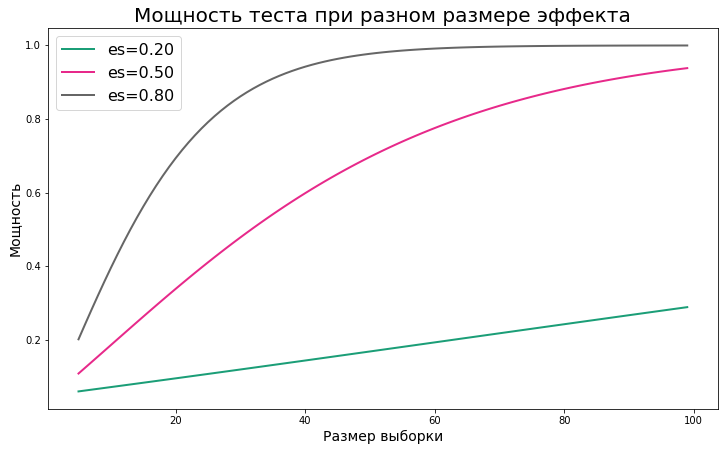

In [51]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))

analysis = TTestIndPower()

_, axes = plt.subplots(1, 1, figsize=(12,7))

analysis.plot_power(
    dep_var='nobs',
    nobs=sample_sizes, 
    effect_size=effect_sizes,
    ax=axes
)

axes.set_title("Мощность теста при разном размере эффекта", fontsize=20)
axes.set_xlabel("Размер выборки", fontsize=14)
axes.set_ylabel("Мощность", fontsize=14)
plt.legend(fontsize=16);

На графике мы видим как меняется мощность критерия при трёх разных размерах эффекта. Если нас интересует большой эффект, то мы выходим к единице при примерно $60$ наблюдениях.